# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [3]:
from utils import get_dataset
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import tensorflow as tf

%matplotlib inline

In [5]:
dataset = get_dataset("../obj-data/data/train/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['../obj-data/data/train/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['../obj-data/data/train/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 86
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


## Write a function to display an image and the bounding boxes

Implement the `display_images` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [3]:
def display_images(batch):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
    fig,ax = plt.subplots()
    image = batch["image"].numpy()
    ax.imshow(image)
    
    colormap={1:'red', 2:"blue",4:"green"}
    
    for bbox , label in zip(batch["groundtruth_boxes"].numpy() ,batch["groundtruth_classes"].numpy()):
        y1,x1,y2,x2 = bbox
        xy = (x1*image.shape[0],y1*image.shape[1])
        w = (x2 - x1) * image.shape[0]
        h = (y2 - y1) * image.shape[1]
        
        rec = patches.Rectangle(xy,w,h, facecolor='none',edgecolor=colormap[label])
        ax.add_patch(rec)

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

<Figure size 720x720 with 0 Axes>

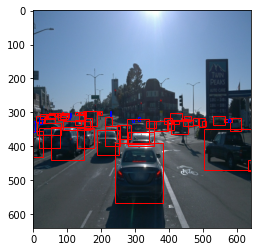

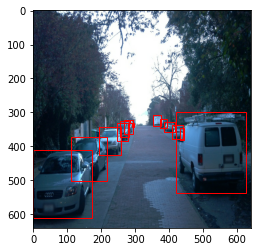

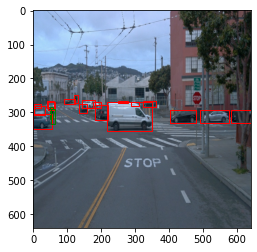

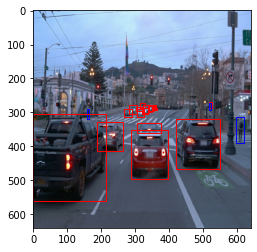

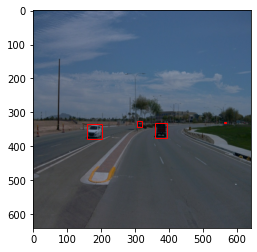

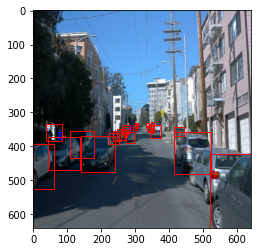

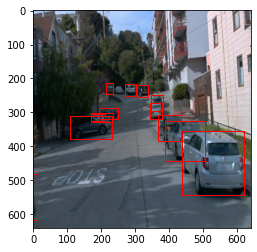

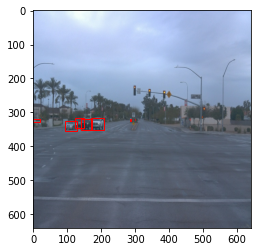

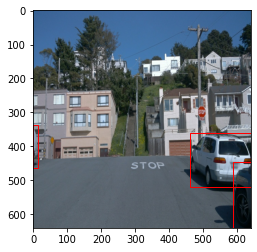

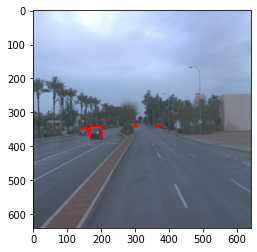

In [8]:
# Display 10 random images in dataset
plt.figure(figsize=(10,10))
plt.subplots_adjust(left=None, bottom=0, right=None, top=None, wspace=0, hspace=None)
for _ in range(10):
    for batch in dataset.shuffle(100,reshuffle_each_iteration=True).take(1):
        display_images(batch)
plt.show()

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

86 10 3


Text(0.5, 1.0, 'Train, Validation and Test tfrecords distribution ')

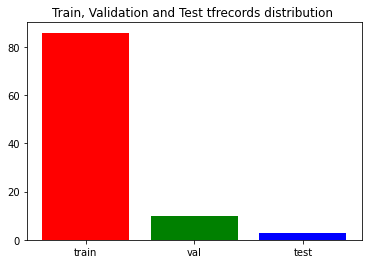

In [9]:
train_dataset =  len(glob.glob("data/train/*.tfrecord"))
val_dataset =  len(glob.glob("data/val/*.tfrecord"))
test_dataset =  len(glob.glob("data/test/*.tfrecord"))
print(train_dataset,val_dataset,test_dataset)
xlabel=["train","val","test"]
plt.bar(xlabel,[train_dataset,val_dataset,test_dataset],color=["red","green","blue"])
plt.title("Train, Validation and Test tfrecords distribution ")

for data in dataset.take(10):
    filename = data["filename"].numpy().decode("UTF8")
    image = data["image"].numpy().astype("uint8")
    print(filename)
    print(image.shape)

{'car': 173876, 'pedestrian': 48563, 'cyclist': 1263}


Text(0.5, 1.0, 'Distribution of 3 class for 10000 images')

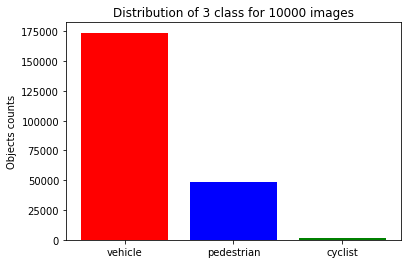

In [10]:
class_total_count = {"car": 0, "pedestrian": 0, "cyclist": 0}
class_keys = [k for k, v in class_total_count.items()]
class_count = [v for k, v in class_total_count.items()]
for batch in dataset.take(10000):
    classes = batch['groundtruth_classes'].numpy()
    for c in classes:
        if c == 1:
            class_total_count[class_keys[0]] += 1
        elif c == 2:
            class_total_count[class_keys[1]] += 1
        else:
            class_total_count[class_keys[2]] += 1
print(class_total_count)
class_name = ["vehicle","pedestrian","cyclist"]
plt.bar(class_name,class_total_count.values(),color=["red","blue","green"])
plt.ylabel("Objects counts")
plt.title("Distribution of 3 class for 10000 images")

Text(0.5, 1.0, 'Distribution of daytime for 10000 images')

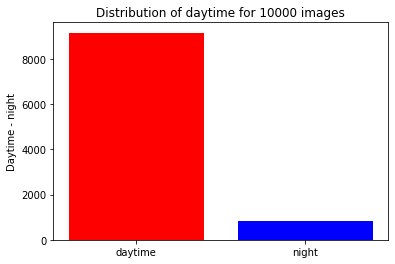

In [11]:
scene_total_count = {"daytime": 0, "night": 0}
scene_keys = [k for k, v in scene_total_count.items()]
for batch in dataset.take(10000):
    gray_image = tf.cast(tf.image.rgb_to_grayscale(batch['image']), tf.float32)
    if (tf.reduce_sum(gray_image)/(640*640) > 50):
        scene_total_count[scene_keys[0]] += 1
    else:
        scene_total_count[scene_keys[1]] += 1
plt.bar(scene_total_count.keys(),scene_total_count.values(),color=["red","blue"])
plt.ylabel("Daytime - night")
plt.title("Distribution of daytime for 10000 images")

Text(0.5, 1.0, 'Distribution of bbox for 10000 images')

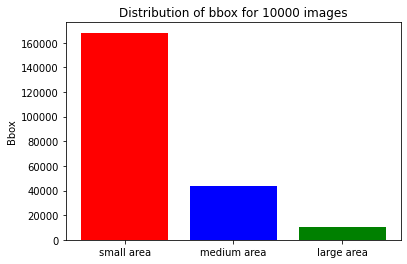

In [6]:
bbox_size_total_count = {"small area": 0, "medium area": 0, "large area": 0}
bbox_size_keys = [k for k, v in bbox_size_total_count.items()]
for batch in dataset.take(10000):
    bboxes = batch['groundtruth_boxes'].numpy()
    for bbox in bboxes:
        y1, x1, y2, x2 = bbox
        y1 = y1 * 640
        x1 = x1 * 640
        y2 = y2 * 640
        x2 = x2 * 640
        area = (y2 - y1) * (x2 - x1)
        if area < (32*32):
            bbox_size_total_count[bbox_size_keys[0]] += 1
        elif area >= (32*32) and area < (96*96):
            bbox_size_total_count[bbox_size_keys[1]] += 1
        else:
            bbox_size_total_count[bbox_size_keys[2]] += 1
plt.bar(bbox_size_total_count.keys(),bbox_size_total_count.values(),color=["red","blue","green"])
plt.ylabel("Bbox")
plt.title("Distribution of bbox for 10000 images")

Text(0.5, 1.0, 'Distribution of bbox per image for 10000 images')

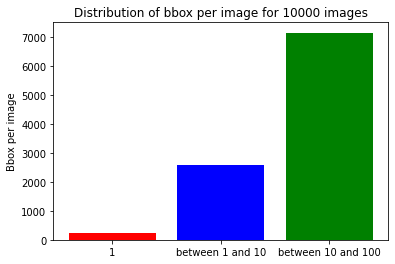

In [13]:
bbox_count_in_image = {"1": 0, "between 1 and 10": 0, "between 10 and 100": 0}
bbox_count_in_image_keys = [k for k, v in bbox_count_in_image.items()]
for batch in dataset.take(10000):
    bboxes = batch['groundtruth_boxes'].numpy()
    box_count = len(bboxes)
    if box_count < 1:
        bbox_count_in_image[bbox_count_in_image_keys[0]] += 1
    elif box_count >= 1 and box_count < 10:
        bbox_count_in_image[bbox_count_in_image_keys[1]] += 1
    elif box_count >= 10 and box_count < 100:
        bbox_count_in_image[bbox_count_in_image_keys[2]] += 1
    else:
        print("There are images with more than 100 boxes")
plt.bar(bbox_count_in_image.keys(),bbox_count_in_image.values(),color=["red","blue","green"])
plt.ylabel("Bbox per image")
plt.title("Distribution of bbox per image for 10000 images")